<a href="https://colab.research.google.com/github/PrajwalSingh048/Playstore-App-Review-Analysis/blob/main/Capstone_Project_1_Play_Store_App_Review_Analysis_By_Prajwal_Singh_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## <b> The Play Store apps data has enormous potential to drive app-making businesses to success. Actionable insights can be drawn for developers to work on and capture the Android market. </b>

## <b> Each app (row) has values for catergory, rating, size, and more. Another dataset contains customer reviews of the android apps.</b>

## <b> Explore and analyze the data to discover key factors responsible for app engagement and success. </b>

Importing necessary libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

Mounting my google drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Creating path variale for both the datasets

In [ ]:
#creating data files path and reading the csv files
playstore_data_path = '/content/drive/MyDrive/Play Store App Review Analysis/Play Store Data.csv'
playstore_df = pd.read_csv(playstore_data_path)
user_reviews_path = '/content/drive/MyDrive/Play Store App Review Analysis/User Reviews.csv'
user_reviews_df = pd.read_csv(user_reviews_path)

Viewing data set features,values and structure of playstore database

In [ ]:
#viewing playstore dataframe
playstore_df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [ ]:
#viewing info of playstore dataframe
playstore_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


In [ ]:
#viewing the available numeric column details
playstore_df.describe()

,Rating
count,9367.000000
mean,4.193338
std,0.537431
min,1.000000
25%,4.000000
50%,4.300000
75%,4.500000
max,19.000000


In [ ]:
#viewing the columns name
playstore_df.columns

Index(['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type',
       'Price', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver',
       'Android Ver'],
      dtype='object')

Viewing data set features,values and structure of User reviews database

In [ ]:
#viewing the dataframe
user_reviews_df

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
0,10 Best Foods for You,I like eat delicious food. That's I'm cooking ...,Positive,1.00,0.533333
1,10 Best Foods for You,This help eating healthy exercise regular basis,Positive,0.25,0.288462
2,10 Best Foods for You,NaN,NaN,NaN,NaN
3,10 Best Foods for You,Works great especially going grocery store,Positive,0.40,0.875000
4,10 Best Foods for You,Best idea us,Positive,1.00,0.300000
...,...,...,...,...,...
64290,Houzz Interior Design Ideas,NaN,NaN,NaN,NaN
64291,Houzz Interior Design Ideas,NaN,NaN,NaN,NaN
64292,Houzz Interior Design Ideas,NaN,NaN,NaN,NaN
64293,Houzz Interior Design Ideas,NaN,NaN,NaN,NaN


In [ ]:
#viewing the database info
user_reviews_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64295 entries, 0 to 64294
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   App                     64295 non-null  object 
 1   Translated_Review       37427 non-null  object 
 2   Sentiment               37432 non-null  object 
 3   Sentiment_Polarity      37432 non-null  float64
 4   Sentiment_Subjectivity  37432 non-null  float64
dtypes: float64(2), object(3)
memory usage: 2.5+ MB


In [ ]:
#viewing the database numeric details
user_reviews_df.describe()

,Sentiment_Polarity,Sentiment_Subjectivity
count,37432.000000,37432.000000
mean,0.182146,0.492704
std,0.351301,0.259949
min,-1.000000,0.000000
25%,0.000000,0.357143
50%,0.150000,0.514286
75%,0.400000,0.650000
max,1.000000,1.000000


In [ ]:
playstore_df.isnull().sum()

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64

In [ ]:
user_reviews_df.isnull().sum()

App                           0
Translated_Review         26868
Sentiment                 26863
Sentiment_Polarity        26863
Sentiment_Subjectivity    26863
dtype: int64

In [ ]:
percent_missing =playstore_df.isnull().sum() * 100 / len(playstore_df)
playstore_missing_value_df = pd.DataFrame({'column_name': playstore_df.columns,
                                 'percent_missing': percent_missing})

In [ ]:
playstore_missing_value_df

,column_name,percent_missing
App,App,0.000000
Category,Category,0.000000
Rating,Rating,13.596532
Reviews,Reviews,0.000000
Size,Size,0.000000
Installs,Installs,0.000000
Type,Type,0.009224
Price,Price,0.000000
Content Rating,Content Rating,0.009224
Genres,Genres,0.000000


In [ ]:
percent_missing =user_reviews_df.isnull().sum() * 100 / len(user_reviews_df)
missing_value_df = pd.DataFrame({'column_name': user_reviews_df.columns,
                                 'percent_missing': percent_missing})

In [ ]:
missing_value_df

,column_name,percent_missing
App,App,0.000000
Translated_Review,Translated_Review,41.788631
Sentiment,Sentiment,41.780854
Sentiment_Polarity,Sentiment_Polarity,41.780854
Sentiment_Subjectivity,Sentiment_Subjectivity,41.780854


In [ ]:
playstore_df = playstore_df[playstore_df['Current Ver'].notna()]
playstore_df = playstore_df[playstore_df['Android Ver'].notna()]
playstore_df = playstore_df[playstore_df['Type'].notna()]

In [ ]:
# Finding mean and median in the Rating column excluding the NaN values.

mean_rating = playstore_df[~playstore_df['Rating'].isnull()]['Rating'].mean()
median_rating = playstore_df[~playstore_df['Rating'].isnull()]['Rating'].median()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


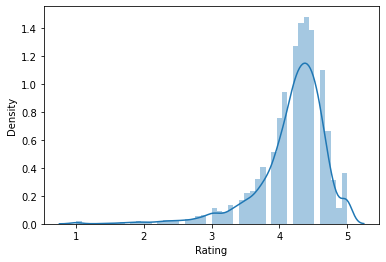

In [ ]:
sns.distplot(playstore_df['Rating'])

In [ ]:
# Replacing the NaN values in the 'Rating' colunm with its median value
playstore_df['Rating'].fillna(value=median_rating,inplace=True)

Dropping duplicates from "App" column

In [ ]:
playstore_df = playstore_df.drop_duplicates(subset = 'App')

In [ ]:
# Dropping dollar symbol applied to the price column
playstore_df['Price'] = playstore_df['Price'].apply(lambda x: float(x[1:]) if '$' in x else float(x))
playstore_df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0.0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0.0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0.0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0.0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [ ]:
#Chaging the datatype of installs to integer by removing commas and "+" symbols

playstore_df['Installs'] = playstore_df['Installs'].apply(lambda x: int(x[:-1].replace(',',''))  if '+' and ',' in x else (int(x[:-1]) if '+' in x else int(x)))

In [ ]:
#chagnging the datatype of Last updated to date_time for easy processing
playstore_df["Last Updated"] = pd.to_datetime(playstore_df['Last Updated'])

In [ ]:
#Bringing the size column to same units that is "MB"
playstore_df['Size'] = playstore_df['Size'].apply(lambda x: float(x[:-1]) if 'M' in x else (round(float(x[:-1])/1024, 4) if 'k' in x else x))

In [ ]:
#converting reviews to type int

playstore_df['Reviews'] = playstore_df['Reviews'].astype(int)

In [ ]:
playstore_df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19.0,10000,Free,0.0,Everyone,Art & Design,2018-01-07,1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14.0,500000,Free,0.0,Everyone,Art & Design;Pretend Play,2018-01-15,2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7,5000000,Free,0.0,Everyone,Art & Design,2018-08-01,1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25.0,50000000,Free,0.0,Teen,Art & Design,2018-06-08,Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8,100000,Free,0.0,Everyone,Art & Design;Creativity,2018-06-20,1.1,4.4 and up


In [ ]:
user_reviews_df = user_reviews_df.dropna()

In [ ]:
merged_df = pd.merge(playstore_df, user_reviews_df, on='App', how = "inner")

In [ ]:
percent_missing_merged = merged_df.isnull().sum() * 100 / len(merged_df)
missing_value_df_merged = pd.DataFrame({'column_name': merged_df.columns,
                                 'percent_missing': percent_missing_merged})

In [ ]:
missing_value_df_merged

,column_name,percent_missing
App,App,0.0
Category,Category,0.0
Rating,Rating,0.0
Reviews,Reviews,0.0
Size,Size,0.0
Installs,Installs,0.0
Type,Type,0.0
Price,Price,0.0
Content Rating,Content Rating,0.0
Genres,Genres,0.0


Q1.What arte the most popular apps (popularity---> no:of installs+ rating) ?

In [ ]:
df_1 = merged_df[['Rating', 'Installs', 'App']]

In [ ]:
df_1.head()

,Rating,Installs,App
0,3.9,500000,Coloring book moana
1,3.9,500000,Coloring book moana
2,3.9,500000,Coloring book moana
3,3.9,500000,Coloring book moana
4,3.9,500000,Coloring book moana


In [ ]:
df_r = df_1.sort_values(['Rating'],
              ascending = [False])

In [ ]:
df_i = df_1.sort_values(['Installs'],
              ascending = [False])

In [ ]:
df_comb = pd.merge(df_r, df_i, on='App', how = "inner")

In [ ]:
df_comb = df_comb.drop_duplicates(subset = 'App')

In [ ]:
df_comb.head(20)

,Rating_x,Installs_x,App,Rating_y,Installs_y
0,4.9,500000,Down Dog: Great Yoga Anywhere,4.9,500000
1600,4.9,100000,CDL Practice Test 2018 Edition,4.9,100000
2176,4.9,100000,DMV Permit Practice Test 2018 Edition,4.9,100000
3332,4.8,10000000,30 Day Fitness Challenge - Workout at Home,4.8,10000000
4293,4.8,1000000,GoodRx Drug Prices and Coupons,4.8,1000000
5662,4.8,1000000,Home Workout for Men - Bodybuilding,4.8,1000000
6338,4.8,10000000,Home Workout - No Equipment,4.8,10000000
7014,4.8,100000,Fuzzy Seasons: Animal Forest,4.8,100000
7210,4.8,1000000,Calculator with Percent (Free),4.8,1000000
7214,4.8,1000000,GPS Speedometer and Odometer,4.8,1000000


In [ ]:
df_comb = df_comb[['App','Rating_x', 'Installs_x']]

Q2.What are the top 20 most popular apps based on Rating and number of installs ?

In [ ]:
from matplotlib import pyplot

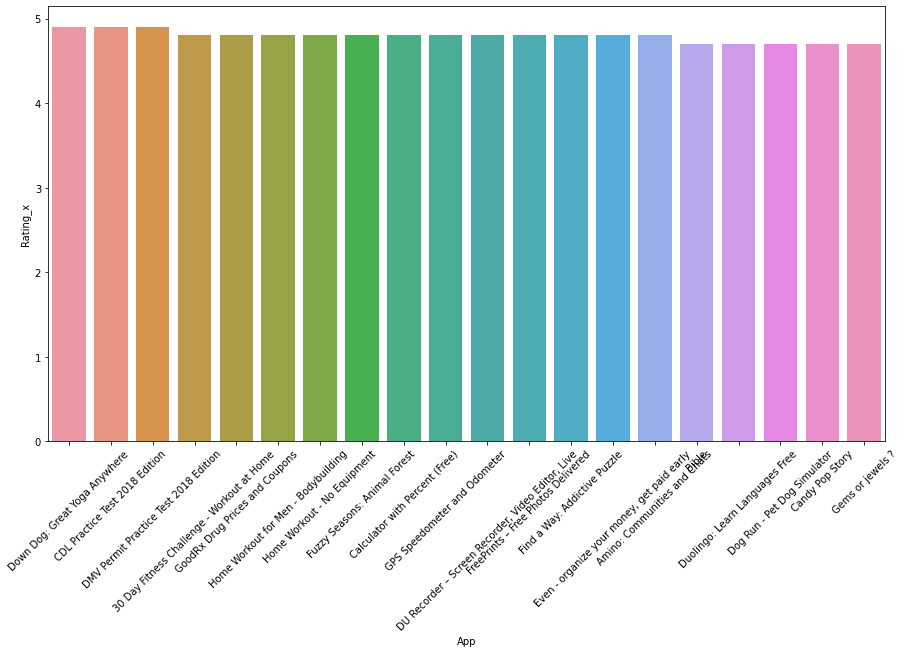

In [ ]:
fig = plt.figure(figsize=(15, 8));
sns.barplot(data = df_comb, x = df_comb['App'][:20], y = df_comb['Rating_x'][:20]);
plt.xticks(rotation = 45);

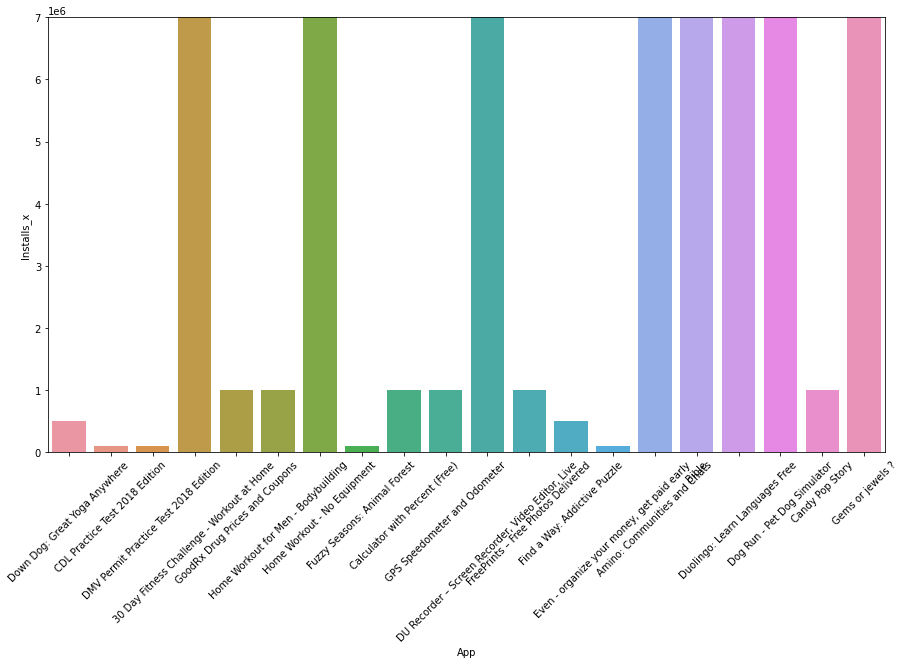

In [ ]:
fig = plt.figure(figsize=(15, 8));
sns.barplot(data = df_comb, x = df_comb['App'][:20], y = df_comb['Installs_x'][:20]);
plt.ylim(0,7000000)
plt.xticks(rotation = 45);

Q3.What are the top 20 least popular apps based on Rating and number of installs ?



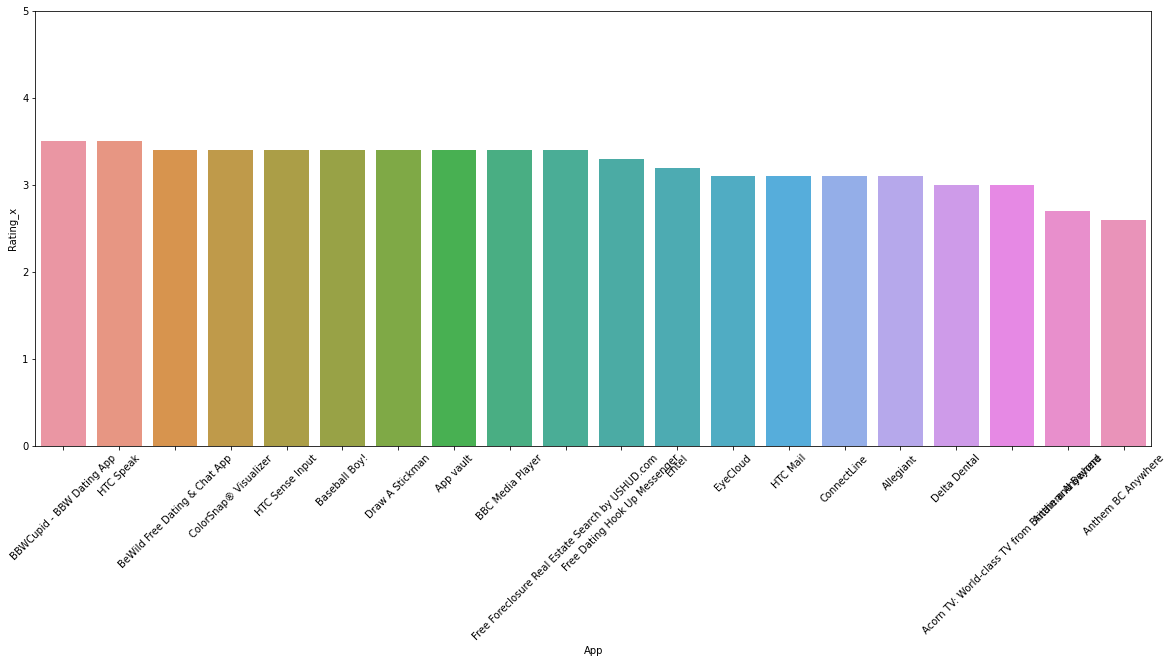

In [ ]:
fig = plt.figure(figsize=(20, 8));
sns.barplot(data = df_comb, x = df_comb['App'][-20:], y = df_comb['Rating_x'][-20:]);
plt.ylim(0,5)
plt.xticks(rotation = 45);

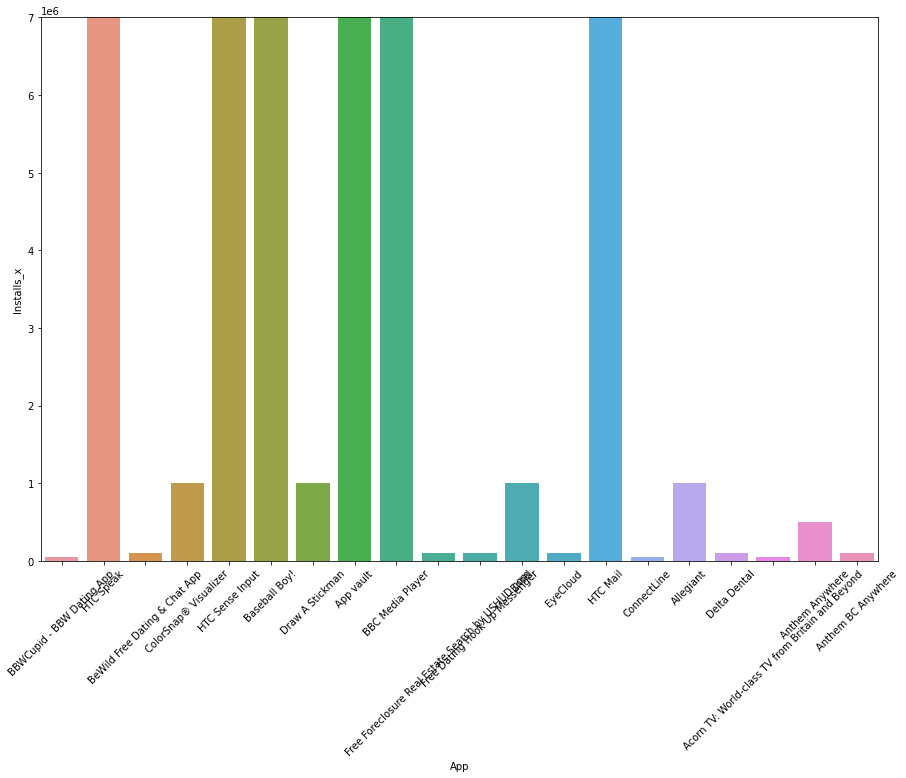

In [ ]:
fig = plt.figure(figsize=(15, 10));
sns.barplot(data = df_comb, x = df_comb['App'][-20:], y = df_comb['Installs_x'][-20:]);
plt.ylim(0,7000000)
plt.xticks(rotation = 45);

Q4.Which category apps are most installed?

Text(0.5, 1.0, 'Total app installs in each category')

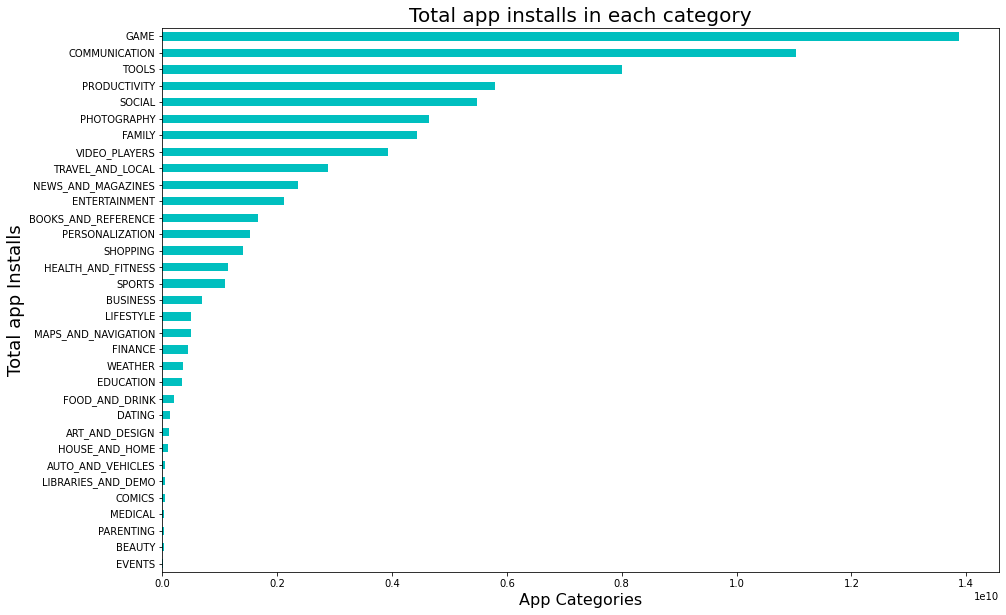

In [ ]:
# total app installs in each category of the play store

a = playstore_df.groupby(['Category'])['Installs'].sum().sort_values()
a.plot.barh(figsize=(15,10), color = 'c', )
plt.ylabel('Total app Installs', fontsize = 18)
plt.xlabel('App Categories', fontsize = 16)
plt.xticks()
plt.title('Total app installs in each category', fontsize = 20)

Q5.What is the pecentage of apps free vs apps paid ?

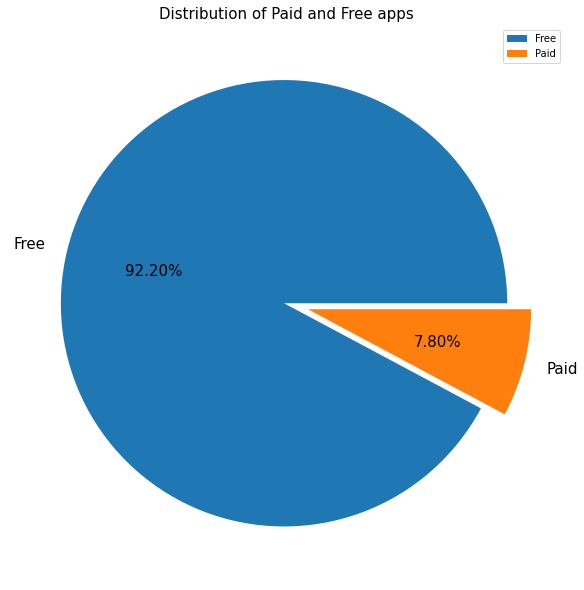

In [ ]:
data = playstore_df['Type'].value_counts() 
labels = ['Free', 'Paid']

# create pie chart
plt.figure(figsize=(10,15))
explode=(0.01,0.1)
plt.pie(data, labels = labels, autopct='%.2f%%',explode=explode,textprops={'fontsize': 15})
plt.title('Distribution of Paid and Free apps',size=15,loc='center')
plt.legend()

apps free installs vs app paid installs

Q6.What is top Categories on Play Store ?




In [ ]:
playstore_df.groupby("Category")["App"].count().sort_values(ascending= False)

Category
FAMILY                 1828
GAME                    959
TOOLS                   825
BUSINESS                420
MEDICAL                 395
PERSONALIZATION         374
PRODUCTIVITY            374
LIFESTYLE               369
FINANCE                 345
SPORTS                  325
COMMUNICATION           315
HEALTH_AND_FITNESS      288
PHOTOGRAPHY             281
NEWS_AND_MAGAZINES      254
SOCIAL                  239
BOOKS_AND_REFERENCE     221
TRAVEL_AND_LOCAL        219
SHOPPING                202
DATING                  171
VIDEO_PLAYERS           163
MAPS_AND_NAVIGATION     131
EDUCATION               119
FOOD_AND_DRINK          112
ENTERTAINMENT           102
AUTO_AND_VEHICLES        85
LIBRARIES_AND_DEMO       83
WEATHER                  79
HOUSE_AND_HOME           74
EVENTS                   64
ART_AND_DESIGN           63
PARENTING                60
COMICS                   56
BEAUTY                   53
Name: App, dtype: int64

In [ ]:
x = playstore_df['Category'].value_counts()
y = playstore_df['Category'].value_counts().index
x_list = []
y_list = []
for i in range(len(x)):
    x_list.append(x[i])
    y_list.append(y[i])

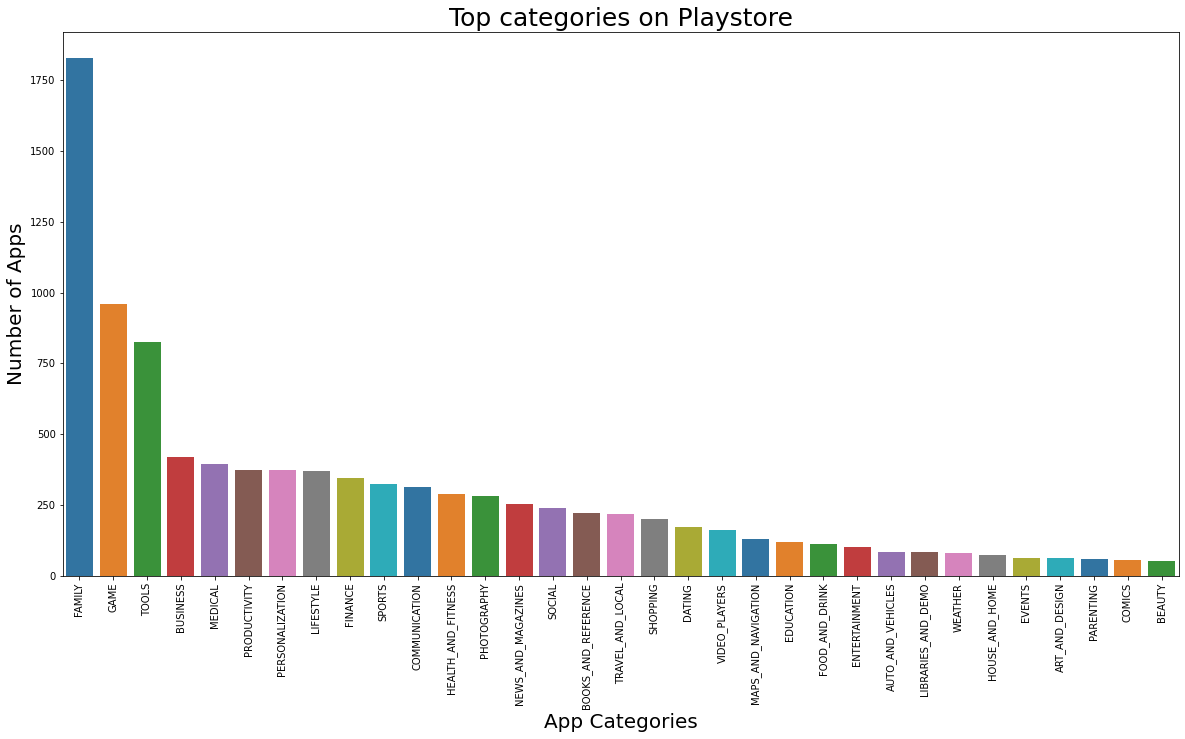

In [ ]:
#Number of apps belonging to each category in the playstore
plt.figure(figsize=(20,10))
plt.xlabel('App Categories', size=20)
plt.ylabel('Number of Apps', size=20)
graph = sns.barplot(y = x_list, x = y_list, palette= "tab10")
graph.set_title("Top categories on Playstore", fontsize = 25)
graph.set_xticklabels(graph.get_xticklabels(), rotation= 90,);

Total categories are 33 in the dataset From the above output we can see that most of the apps are underFAMILY & GAME category and least are of EVENTS & BEAUTY Category.

A heat map shows the relationship between two items and provides rating information, such as high to low or poor to excellent. This chart displays the rating information using varying colors or saturation.

In [ ]:
 playstore_df = playstore_df[['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type',
       'Price', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver',
       'Android Ver']]

In [ ]:
corr_df = playstore_df.corr()

In [ ]:
corr_df

,Rating,Reviews,Installs,Price
Rating,1.000000,0.050215,0.034310,-0.018673
Reviews,0.050215,1.000000,0.625158,-0.007604
Installs,0.034310,0.625158,1.000000,-0.009413
Price,-0.018673,-0.007604,-0.009413,1.000000


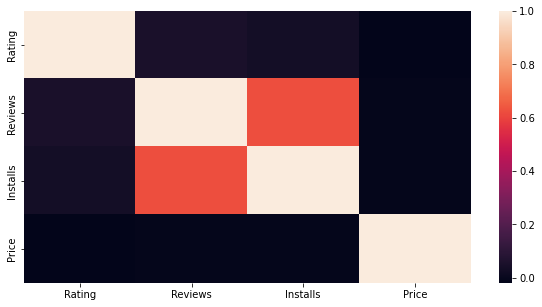

In [ ]:
plt.figure(figsize=(10,5))
sns.heatmap(corr_df)